In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('D:/VS_Code_Projects/data arabic signs/Arabic Sign Language Letters Dataset.csv')

In [17]:
data.describe()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20
count,7137.000000,7137.000000,7.137000e+03,7137.000000,7137.000000,7137.000000,7137.000000,7137.000000,7137.000000,7137.000000,...,7137.000000,7137.000000,7137.000000,7137.000000,7137.000000,7137.000000,7137.000000,7137.000000,7137.000000,7137.000000
mean,0.467330,0.756036,2.238571e-07,0.516278,0.691799,-0.059118,0.543071,0.599932,-0.095455,0.549572,...,-0.099679,0.434150,0.529036,-0.154223,0.446705,0.546285,-0.149868,0.449611,0.550124,-0.135265
std,0.162783,0.143334,1.191918e-06,0.158857,0.131123,0.073518,0.178300,0.116039,0.100647,0.182262,...,0.102257,0.170680,0.121807,0.119952,0.162638,0.139097,0.120491,0.166379,0.162112,0.123846
min,-0.128424,-0.014049,-5.071185e-06,-0.083088,0.105294,-0.434025,-0.003384,0.118198,-0.635680,0.041920,...,-0.940389,-0.047312,0.094960,-1.084415,-0.071001,0.084672,-1.074113,-0.140902,0.045111,-1.032123
25%,0.378743,0.673478,-7.131400e-07,0.412982,0.605782,-0.101742,0.403254,0.523305,-0.149145,0.422046,...,-0.147942,0.304020,0.446164,-0.213693,0.328114,0.443836,-0.212086,0.335716,0.432067,-0.199410
50%,0.470101,0.775747,3.265766e-07,0.534244,0.706920,-0.064832,0.581652,0.610618,-0.095403,0.567564,...,-0.087637,0.428727,0.523013,-0.146519,0.439563,0.549114,-0.143216,0.435468,0.570927,-0.129739
75%,0.553918,0.862242,1.089368e-06,0.628498,0.790821,-0.016081,0.679538,0.684539,-0.043265,0.693702,...,-0.045749,0.551901,0.606504,-0.091427,0.562278,0.647838,-0.087281,0.559123,0.674407,-0.069301
max,1.141863,1.073876,7.022083e-06,1.016284,0.997309,0.305767,0.937721,1.075314,0.523790,0.940163,...,0.562346,0.990960,0.971750,0.621985,0.967077,0.992464,0.660617,1.031613,0.976616,0.682933


In [16]:
data['letter'].value_counts()

letter
Teh            278
Sheen          274
Beh            274
Theh           271
Al             269
Seen           262
Sad            261
Yeh            261
Alef           258
Dad            256
Lam            253
Kaf            252
Meem           240
Laa            240
Feh            236
Teh_Marbuta    230
Dal            219
Ghain          216
Noon           214
Zah            210
Ain            209
Reh            206
Heh            203
Waw            201
Tah            196
Khah           196
Qaf            193
Jeem           192
Zain           191
Hah            188
thal           188
Name: count, dtype: int64

In [5]:
from pca import pca as PCA
from sklearn.preprocessing import StandardScaler

model = PCA(n_components=2)
letters = data['letter'].values
data_s = StandardScaler().fit_transform(data.drop('letter', axis=1))
pca_result = model.fit_transform(data_s, row_labels=letters) 
pca_result.scatter()

[08-11-2025 21:11:15] [pca.pca] [INFO] Column labels are auto-completed.
[08-11-2025 21:11:15] [pca.pca] [INFO] The PCA reduction is performed on the 63 columns of the input dataframe.
[08-11-2025 21:11:15] [pca.pca] [INFO] Fit using PCA.
[08-11-2025 21:11:15] [pca.pca] [INFO] Compute loadings and PCs.
[08-11-2025 21:11:15] [pca.pca] [INFO] Compute explained variance.
[08-11-2025 21:11:15] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[08-11-2025 21:11:17] [pca.pca] [INFO] Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[08-11-2025 21:11:17] [pca.pca] [INFO] Outlier detection using SPE/DmodX with n_std=[3]


AttributeError: 'dict' object has no attribute 'scatter'

[08-11-2025 21:17:50] [scatterd.scatterd] [INFO] Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [42.85%] of the variance'}, xlabel='PC1 (24.5% expl.var)', ylabel='PC2 (18.2% expl.var)'>)

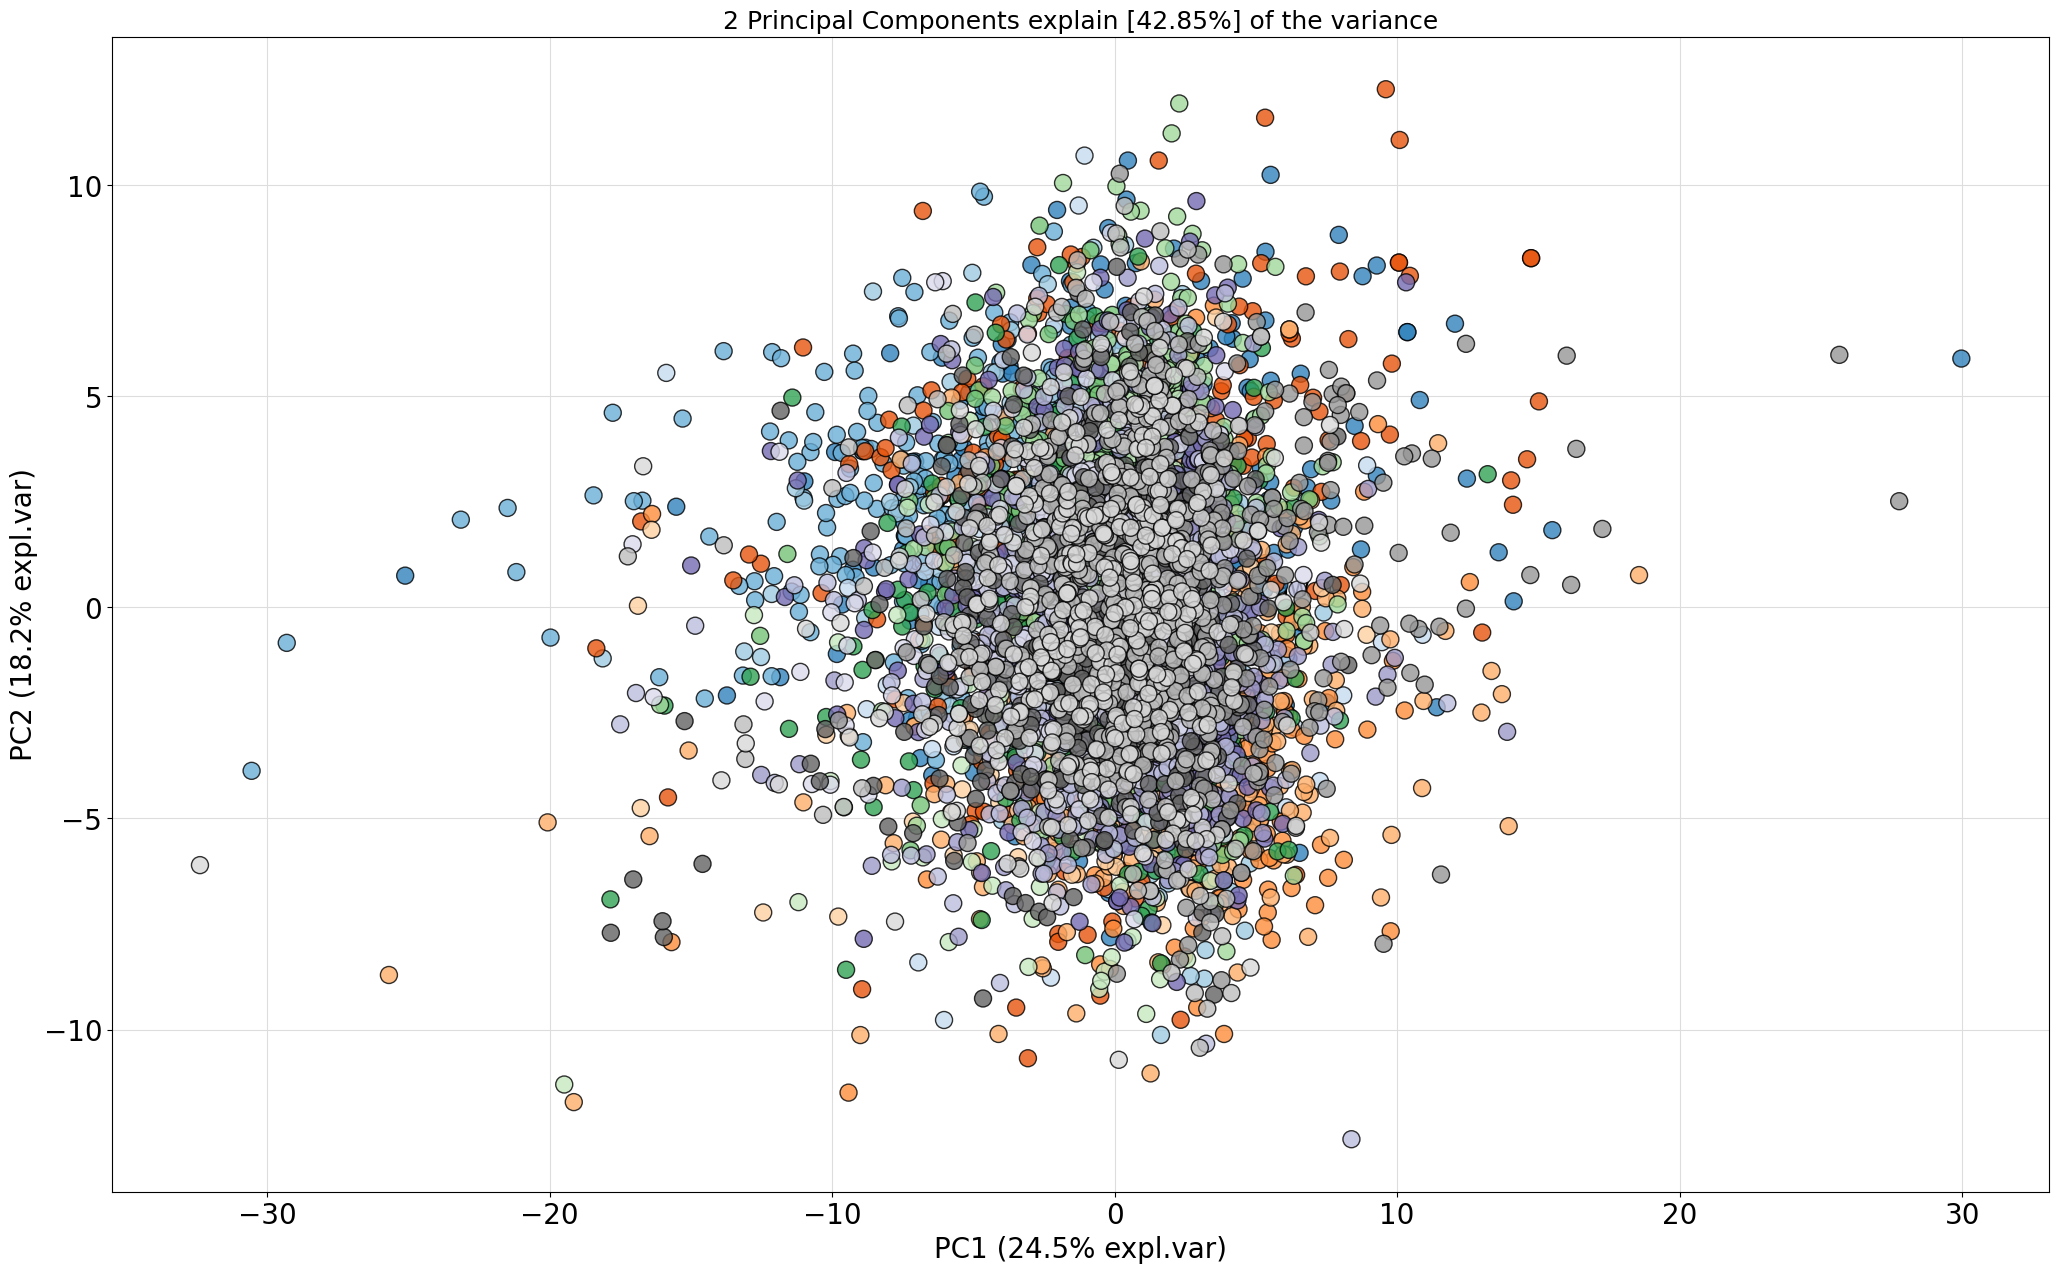

In [12]:
model.scatter()

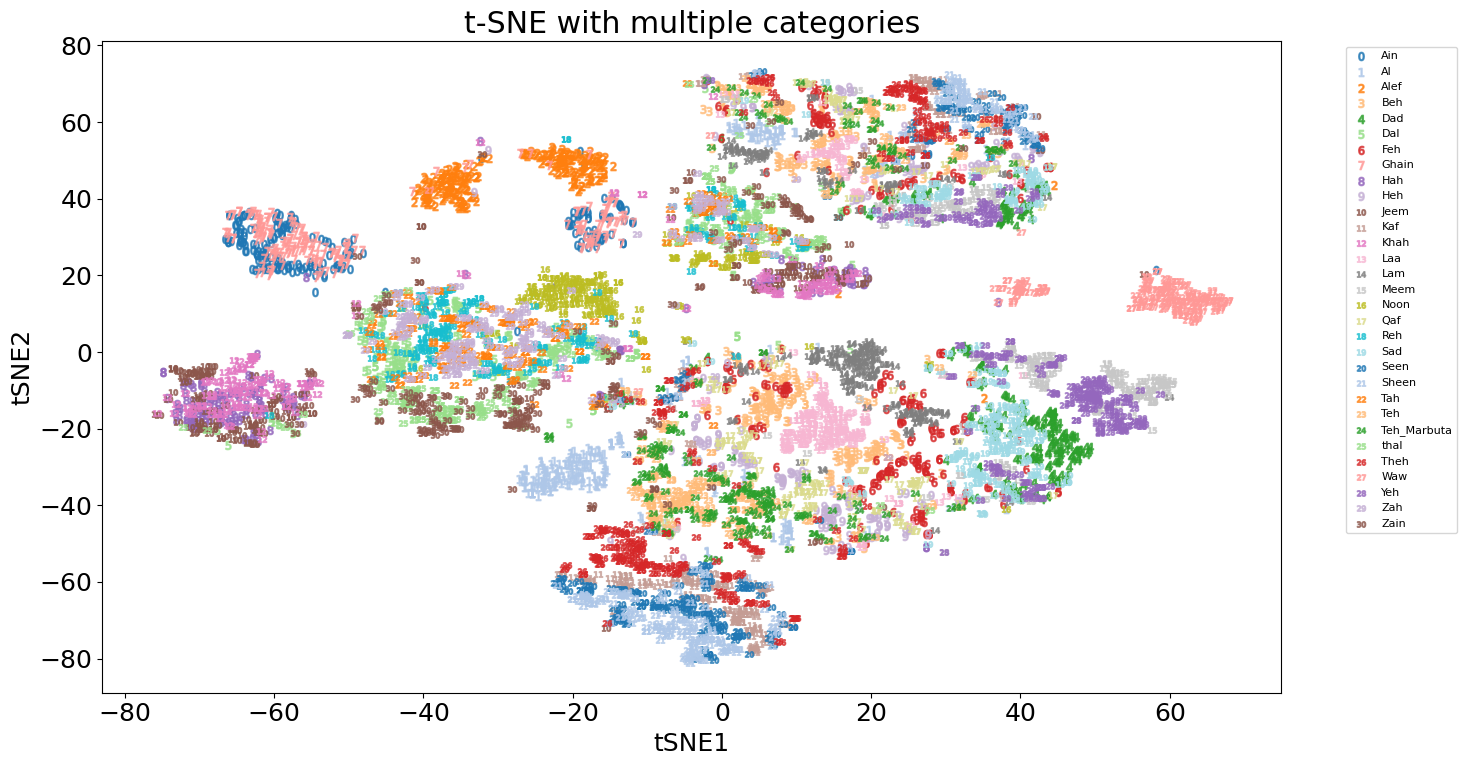

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import itertools
import numpy as np

# Example: X = features, y = labels
X = data.drop(columns=["letter"])
y = data["letter"]

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, perplexity = 40, random_state=42)
X_embedded = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_embedded, columns=["tSNE1", "tSNE2"])
tsne_df["letters"] = y.values

# Colors and markers
colors = plt.cm.tab20(np.linspace(0, 1, 20))  # 20 distinct colors
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h']  # 10 marker shapes
color_cycle = itertools.cycle(colors)
marker_cycle = itertools.cycle(markers)

plt.figure(figsize=(15, 8))

# Assign each category a unique (color, marker) pair
category_styles = {}
for label in tsne_df["letters"].unique():
    category_styles[label] = (next(color_cycle), next(marker_cycle))
count = 0
for label, (color, marker) in category_styles.items():
    subset = tsne_df[tsne_df["letters"] == label]
    plt.scatter(subset["tSNE1"], subset["tSNE2"],
                label=label, c=[color], marker="$"+str(count)+"$", alpha=0.7)
    count += 1

plt.title("t-SNE with multiple categories")
plt.xlabel("tSNE1")
plt.ylabel("tSNE2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()
